<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/01_Arima_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Installing Libraries


In [1]:
!pip install quandl
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00


# Importing required libraries


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import quandl
import json

# Required configuration file which has secret API Key

In [3]:
# Open the file for reading and load the data from it
with open("/content/drive/MyDrive/Configuration/Config.json", "r") as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [4]:
CurrentDate = (datetime.today() - timedelta(days=2)).strftime('%Y-%m-%d')
CurrentDate

'2023-06-14'

In [5]:
DayBefore1000 = (datetime.today() - timedelta(days=2000)).strftime('%Y-%m-%d')
DayBefore1000


'2017-12-24'

# Data Collection & Preparation

In [6]:
def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [7]:
OilPriceInUSD=getDataFromAPI("Nasdaq","OPEC/ORB",DayBefore1000,CurrentDate).reset_index()
OilPriceInUSD['Date'] = pd.to_datetime(OilPriceInUSD['Date']).dt.date
OilPriceInUSD.set_index('Date', inplace=True)
OilPriceInUSD

,Value
Date,
2017-12-26,63.07
2017-12-27,64.24
2017-12-28,64.17
2017-12-29,64.47
2018-01-02,64.84
...,...
2023-06-08,76.55
2023-06-09,75.85
2023-06-12,72.96


In [8]:
EuroPriceInUSD=getDataFromAPI("YFinance","EURUSD=X",DayBefore1000,CurrentDate).reset_index()
EuroPriceInUSD['Date'] = pd.to_datetime(EuroPriceInUSD['Date']).dt.date
EuroPriceInUSD.set_index('Date', inplace=True)
EuroPriceInUSD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-25,1.185677,1.188495,1.184904,1.185607,0,0.0,0.0
2017-12-26,1.187127,1.187790,1.184750,1.187254,0,0.0,0.0
2017-12-27,1.186099,1.191043,1.185565,1.185789,0,0.0,0.0
2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0
2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-07,1.069805,1.074022,1.066883,1.069805,0,0.0,0.0
2023-06-08,1.070744,1.078283,1.070217,1.070744,0,0.0,0.0
2023-06-09,1.078272,1.078749,1.074772,1.078272,0,0.0,0.0


In [9]:
data=EuroPriceInUSD.merge(OilPriceInUSD, on='Date', how='inner').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value
0,2017-12-26,1.187127,1.187790,1.184750,1.187254,0,0.0,0.0,63.07
1,2017-12-27,1.186099,1.191043,1.185565,1.185789,0,0.0,0.0,64.24
2,2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0,64.17
3,2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0,64.47
4,2018-01-02,1.201086,1.208094,1.200855,1.201158,0,0.0,0.0,64.84
...,...,...,...,...,...,...,...,...,...
1402,2023-06-07,1.069805,1.074022,1.066883,1.069805,0,0.0,0.0,76.03
1403,2023-06-08,1.070744,1.078283,1.070217,1.070744,0,0.0,0.0,76.55
1404,2023-06-09,1.078272,1.078749,1.074772,1.078272,0,0.0,0.0,75.85
1405,2023-06-12,1.075095,1.078970,1.073434,1.075095,0,0.0,0.0,72.96


In [10]:
selected_data = data[['Date', 'Close', 'Value']]
selected_data = selected_data.rename(columns={'Close': 'USD_EUR_Price', 'Value': 'Oil_Price'})
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2017-12-26,1.187254,63.07
2017-12-27,1.185789,64.24
2017-12-28,1.190079,64.17
2017-12-29,1.194172,64.47
2018-01-02,1.201158,64.84
...,...,...
2023-06-07,1.069805,76.03
2023-06-08,1.070744,76.55
2023-06-09,1.078272,75.85


In [11]:
selected_data['USD_EUR_Price'].describe()


count    1407.000000
mean        1.131538
std         0.059945
min         0.959619
25%         1.096263
50%         1.131580
75%         1.177829
max         1.251001
Name: USD_EUR_Price, dtype: float64

In [12]:
selected_data['Oil_Price'].describe()


count    1407.000000
mean       69.909559
std        20.252034
min        12.220000
25%        60.660000
50%        69.390000
75%        79.950000
max       128.270000
Name: Oil_Price, dtype: float64

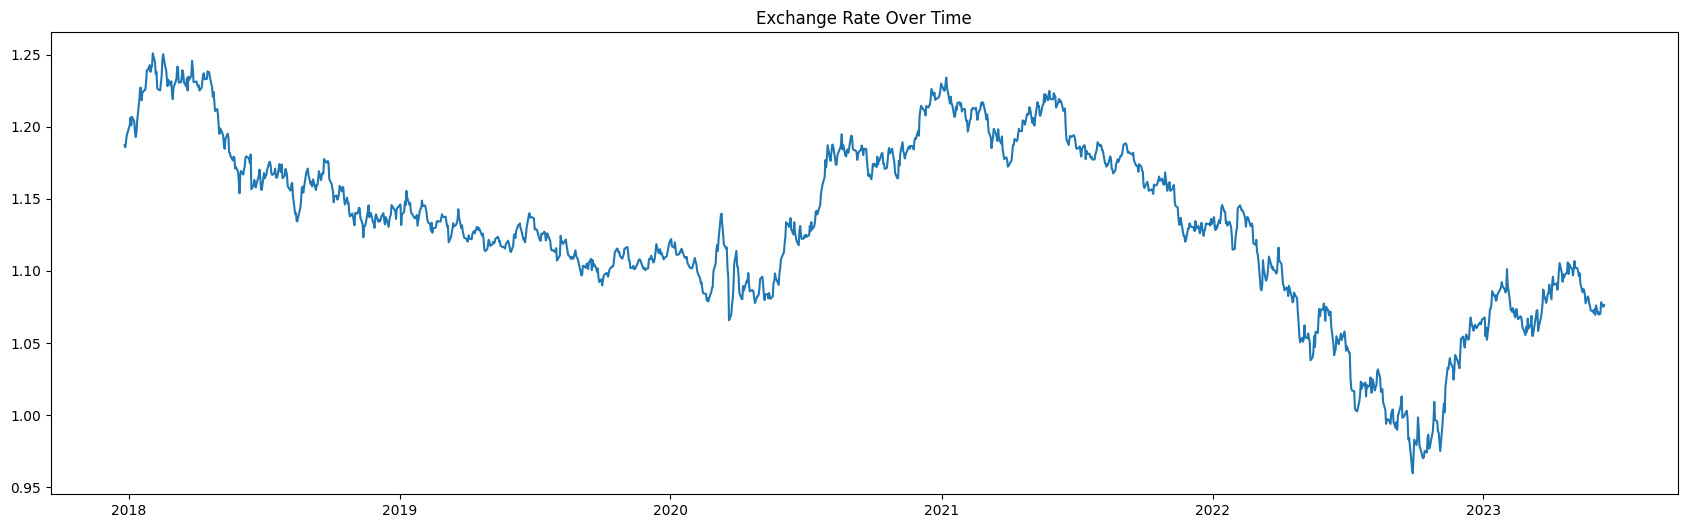

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 6))
plt.plot(selected_data.index, selected_data['USD_EUR_Price'])
plt.title('Exchange Rate Over Time')
plt.show()


# Data Stationary Prepartion

In [14]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(selected_data['USD_EUR_Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.599664
p-value: 0.483762


In [15]:
selected_data['USD_EUR_Price_diff'] = selected_data['USD_EUR_Price']-selected_data['USD_EUR_Price'].shift(1)
selected_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff
Date,,,
2017-12-26,1.187254,63.07,NaN
2017-12-27,1.185789,64.24,-0.001464
2017-12-28,1.190079,64.17,0.004290
2017-12-29,1.194172,64.47,0.004093
2018-01-02,1.201158,64.84,0.006986
...,...,...,...
2023-06-07,1.069805,76.03,-0.001375
2023-06-08,1.070744,76.55,0.000939
2023-06-09,1.078272,75.85,0.007528


In [16]:
from pmdarima.arima.utils import ndiffs

In [17]:
ndiffs(selected_data.USD_EUR_Price,test="adf")

1

In [18]:
result = adfuller(selected_data['USD_EUR_Price_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -36.326415
p-value: 0.000000


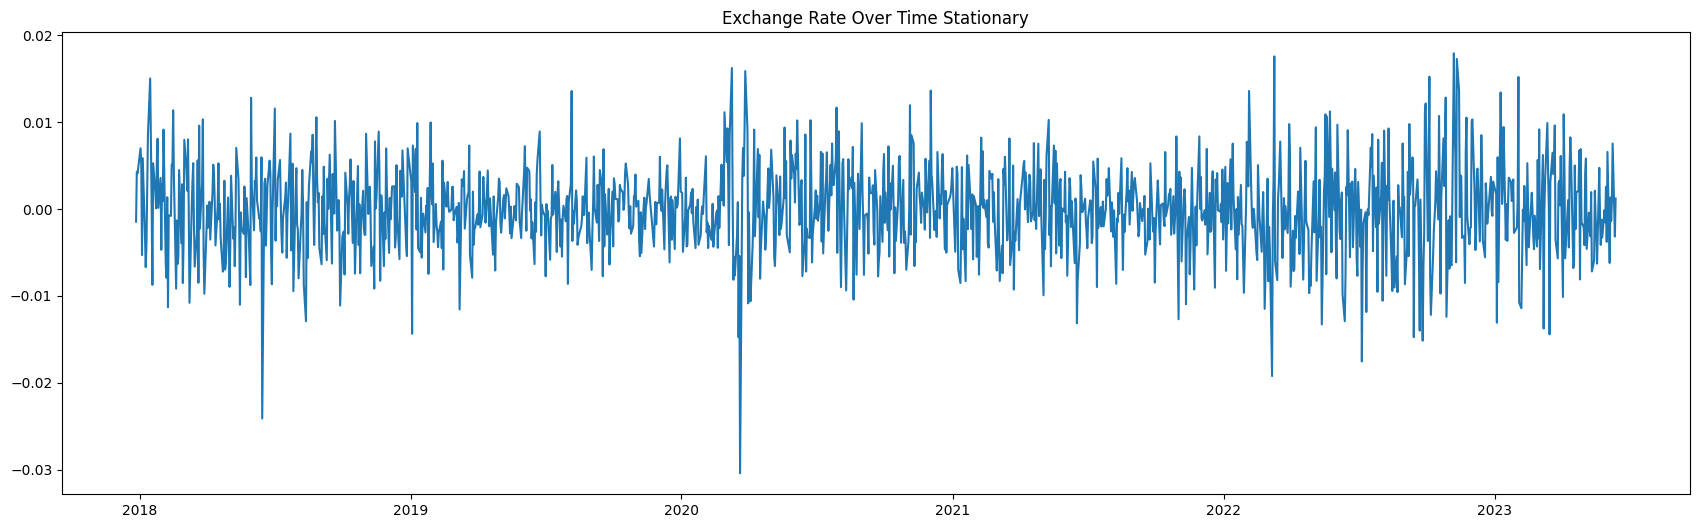

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(21, 6))
plt.plot(selected_data.index, selected_data['USD_EUR_Price_diff'])
plt.title('Exchange Rate Over Time Stationary')
plt.show()


# Training & Testing Data Splitting

In [20]:
# Assuming 'selected_data' is a DataFrame containing the 'USD_EUR_Price' column
# Perform an 80-20 split for training and testing
train_data_size = int(0.8 * len(selected_data))
train_data = selected_data.iloc[:train_data_size]
test_data = selected_data.iloc[train_data_size:]

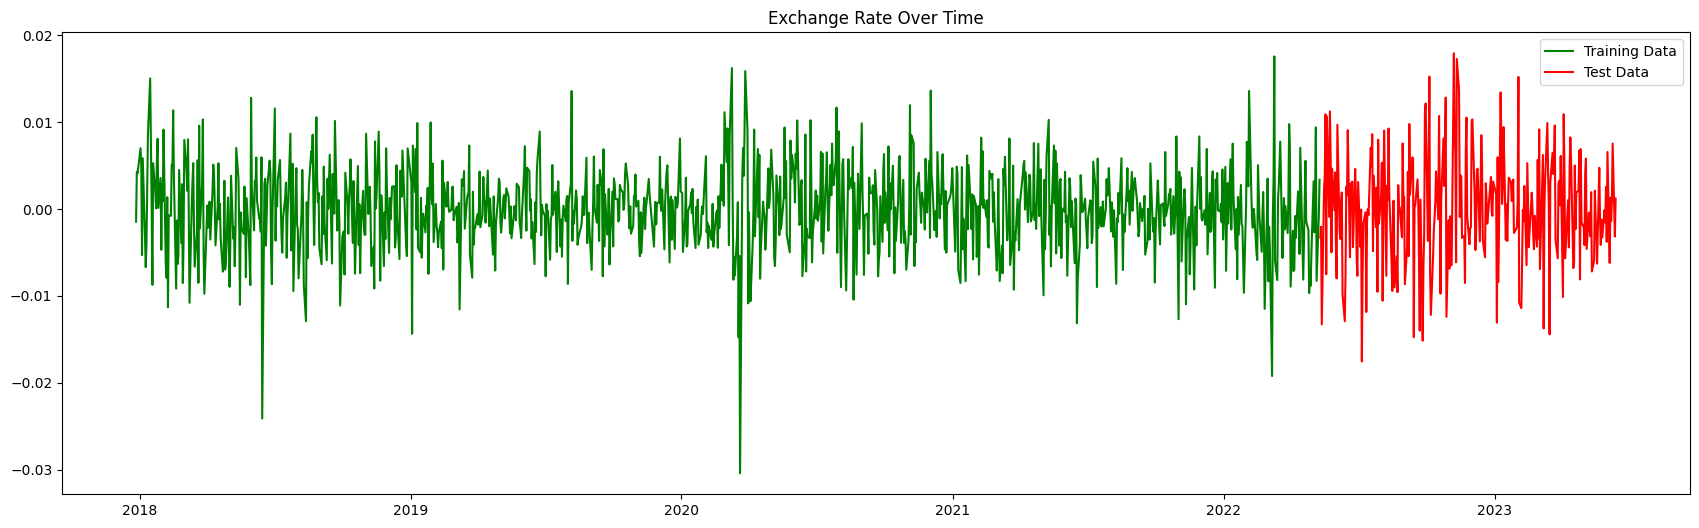

In [21]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['USD_EUR_Price_diff'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['USD_EUR_Price_diff'], color='red', label='Test Data')

plt.title('Exchange Rate Over Time')
plt.legend()
plt.show()


In [22]:
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (1125, 3)
Test data shape:  (282, 3)


#Check ACF and PACF  values

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


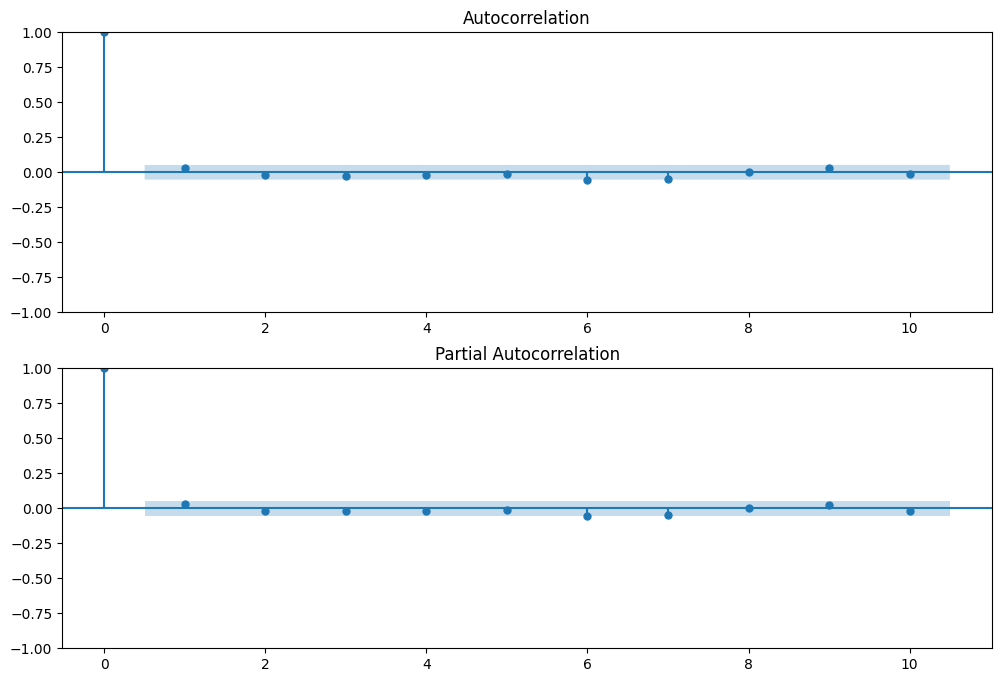

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot the ACF of the differenced series
plot_acf(selected_data['USD_EUR_Price_diff'].dropna(),lags=10 ,ax=ax1)

# Plot the PACF of the differenced series
plot_pacf(selected_data['USD_EUR_Price_diff'].dropna(),lags=10, ax=ax2)

plt.show()


In [38]:
from pmdarima import auto_arima

# Fit auto_arima function
model = auto_arima(selected_data['USD_EUR_Price'],
                   start_p=0, start_q=0,
                   max_p=10, max_q=10, m=0,
                   start_P=2, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10846.486, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10845.805, Time=0.89 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10845.859, Time=4.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10848.150, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10843.994, Time=1.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.653 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1407
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5425.075
Date:                Fri, 16 Jun 2023   AIC                         -10848.150
Time:                        10:40:16   BIC                         -10842.902
Sample:                             0   HQIC                        -10846.189
                               - 1407                             

# ARIMA Model calling

In [39]:
from statsmodels.tsa.arima.model import ARIMA


In [40]:

model=ARIMA(train_data['USD_EUR_Price'],order=(0,1,0))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          USD_EUR_Price   No. Observations:                 1125
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4415.318
Date:                Fri, 16 Jun 2023   AIC                          -8828.636
Time:                        10:44:56   BIC                          -8823.611
Sample:                             0   HQIC                         -8826.737
                               - 1125                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.265e-05   6.54e-07     34.627      0.000    2.14e-05    2.39e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):               247.87
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.27
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

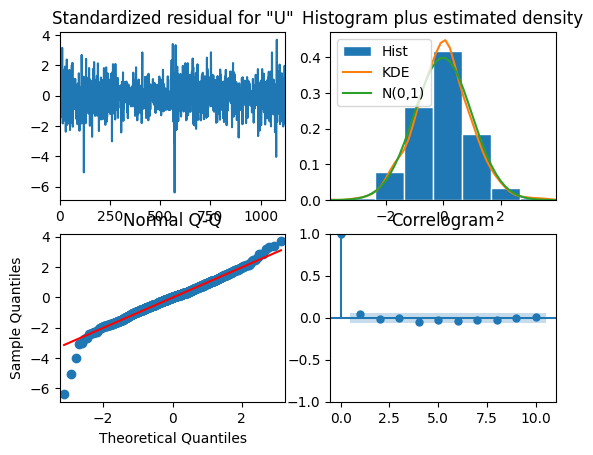

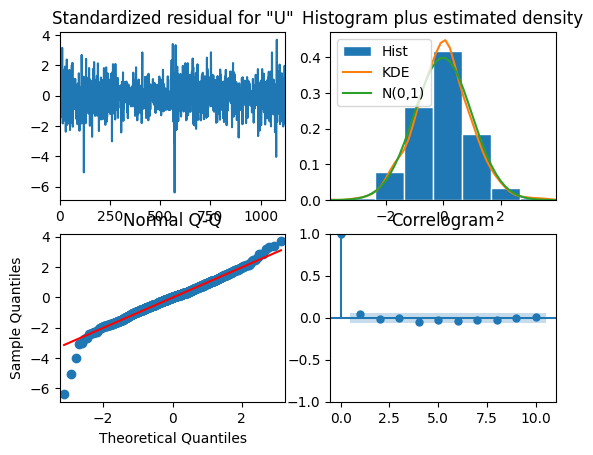

In [42]:
model_fit.plot_diagnostics()

In [43]:
forecast = model_fit.get_forecast(steps=len(test_data))

# Create a new dataframe to hold the forecast
df_forecast = forecast.conf_int()

# Create a new column for the forecasted values
df_forecast['forecast'] = forecast.predicted_mean

df_forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower USD_EUR_Price,upper USD_EUR_Price,forecast
1125,1.047251,1.065908,1.05658
1126,1.043387,1.069772,1.05658
1127,1.040422,1.072737,1.05658
1128,1.037923,1.075237,1.05658
1129,1.035721,1.077439,1.05658
...,...,...,...
1402,0.901042,1.212118,1.05658
1403,0.900762,1.212397,1.05658
1404,0.900483,1.212676,1.05658
1405,0.900205,1.212955,1.05658


In [44]:
# Create a DataFrame for predicted values with a date column
predicted_df = pd.DataFrame({'Date': test_data.index, 'Predicted_Value': df_forecast['forecast'] ,'lower': df_forecast['lower USD_EUR_Price'],'Upper':df_forecast['upper USD_EUR_Price'] })
predicted_df.set_index('Date', inplace=True)
predicted_df

,Predicted_Value,lower,Upper
Date,,,
2022-05-11,1.05658,1.047251,1.065908
2022-05-12,1.05658,1.043387,1.069772
2022-05-13,1.05658,1.040422,1.072737
2022-05-16,1.05658,1.037923,1.075237
2022-05-17,1.05658,1.035721,1.077439
...,...,...,...
2023-06-07,1.05658,0.901042,1.212118
2023-06-08,1.05658,0.900762,1.212397
2023-06-09,1.05658,0.900483,1.212676


In [45]:
# Merge the predicted DataFrame with the test data
combined_data = test_data.merge(predicted_df, left_index=True, right_index=True)
combined_data

,USD_EUR_Price,Oil_Price,USD_EUR_Price_diff,Predicted_Value,lower,Upper
Date,,,,,,
2022-05-11,1.053297,108.92,-0.003283,1.05658,1.047251,1.065908
2022-05-12,1.051248,109.20,-0.002048,1.05658,1.043387,1.069772
2022-05-13,1.037958,112.27,-0.013290,1.05658,1.040422,1.072737
2022-05-16,1.040063,112.98,0.002105,1.05658,1.037923,1.075237
2022-05-17,1.043896,117.10,0.003833,1.05658,1.035721,1.077439
...,...,...,...,...,...,...
2023-06-07,1.069805,76.03,-0.001375,1.05658,0.901042,1.212118
2023-06-08,1.070744,76.55,0.000939,1.05658,0.900762,1.212397
2023-06-09,1.078272,75.85,0.007528,1.05658,0.900483,1.212676


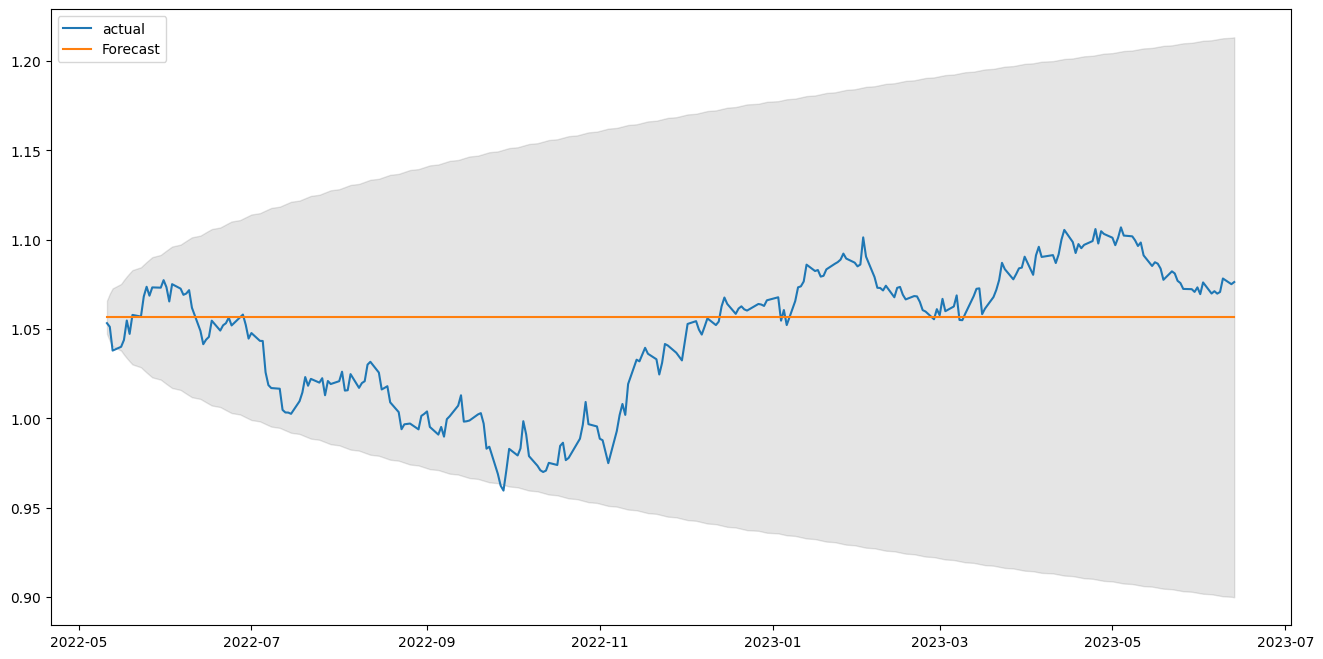

In [46]:
plt.figure(figsize=(16,8))
plt.plot(combined_data['USD_EUR_Price'],label="actual")
plt.plot(combined_data['Predicted_Value'],label="Forecast")
plt.fill_between(combined_data.index,combined_data['lower'],combined_data['Upper'],color='k',alpha=0.1)
plt.legend(loc="upper left")